In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')#ignores all warnings

In [3]:
paths=[]
labels=[]
for dirname,_, filenames in os.walk('TESS Toronto emotional speech set data'):
    # print(dirname)
    #print(filenames)
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        #print(filename)
        label=filename.split('_')[-1]
        #print(label)
        label=label.split('.')[0]
        #print(label.lower())
        labels.append(label.lower())
print('Datset is loaded')    

Datset is loaded


In [4]:
paths[:5]

['TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,TESS Toronto emotional speech set data\OAF_ang...,angry
1,TESS Toronto emotional speech set data\OAF_ang...,angry
2,TESS Toronto emotional speech set data\OAF_ang...,angry
3,TESS Toronto emotional speech set data\OAF_ang...,angry
4,TESS Toronto emotional speech set data\OAF_ang...,angry


In [7]:
df['label'].value_counts()

angry      400
sad        400
happy      400
neutral    400
disgust    400
fear       400
ps         400
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

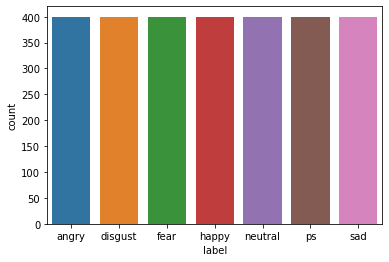

In [8]:
sns.countplot(df['label'])

In [9]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()


def spectogram(data,sr,emotion):
    x=librosa.stft(data)#process the data
    xdb=librosa.amplitude_to_db(abs(x))#coverting file into decibles
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

[-8.17980072e-06 -1.92719643e-04 -2.84470647e-04 ...  1.55152928e-04
  1.13632064e-04  0.00000000e+00]
22050


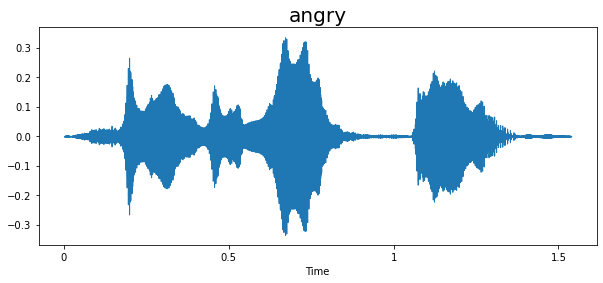

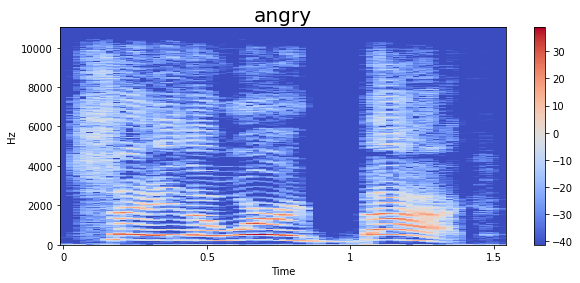

In [10]:
emotion='angry'
path=df['speech'][df['label']==emotion][0]
data,sampling_rate=librosa.load(path)
print(data)
print(sampling_rate)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [11]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [12]:
extract_mfcc(df['speech'][0])

array([-3.9791476e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199812e+00,  1.1357657e+01, -2.1622477e+01, -4.8617826e+00,
       -8.4185266e+00,  6.2100196e-01, -2.9795790e+00,  1.3149230e+00,
       -3.4300953e-01,  2.3402820e+00,  1.9168801e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929300e+00, -9.5256548e+00,
       -8.2061357e+00, -1.2038866e+00, -7.5688171e+00,  9.9129763e+00,
        7.9321532e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827595e+00,  3.0294445e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089766e+00,  2.6034532e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [13]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [14]:
X_mfcc

0       [-397.91476, 78.756226, -20.911753, -20.34902,...
1       [-466.53455, 99.911064, -0.480273, -31.616299,...
2       [-431.5178, 48.56504, -0.8924488, 2.2234004, 0...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873595, 18.061928, 6.0...
                              ...                        
2795    [-408.0878, 82.66084, 30.182566, 48.84698, -3....
2796    [-428.43256, 104.70308, 22.652096, 45.17939, 2...
2797    [-380.35938, 83.53616, 32.67897, 42.358284, -7...
2798    [-436.16336, 91.74894, 26.539776, 41.395664, -...
2799    [-423.6657, 73.28961, 29.890432, 48.220123, 2....
Name: speech, Length: 2800, dtype: object

In [15]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [16]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [17]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [18]:
y = y.toarray()
y.shape

(2800, 7)

In [19]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),

    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),

    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4

In [20]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 13s 363ms/step - loss: 1.1532 - accuracy: 0.5893 - val_loss: 2.1443 - val_accuracy: 0.2839
Epoch 2/50
35/35 [==============================] - 9s 261ms/step - loss: 0.4750 - accuracy: 0.8455 - val_loss: 2.2492 - val_accuracy: 0.3839
Epoch 3/50
35/35 [==============================] - 9s 255ms/step - loss: 0.2911 - accuracy: 0.9121 - val_loss: 1.4550 - val_accuracy: 0.4696
Epoch 4/50
35/35 [==============================] - 9s 260ms/step - loss: 0.1823 - accuracy: 0.9504 - val_loss: 2.3880 - val_accuracy: 0.3589
Epoch 5/50
35/35 [==============================] - 9s 259ms/step - loss: 0.1384 - accuracy: 0.9607 - val_loss: 1.9955 - val_accuracy: 0.4464
Epoch 6/50
35/35 [==============================] - 9s 257ms/step - loss: 0.0990 - accuracy: 0.9714 - val_loss: 2.4412 - val_accuracy: 0.3518
Epoch 7/50
35/35 [==============================] - 9s 256ms/step - loss: 0.1402 - accuracy: 0.9576 - val_loss: 2.3726 - val_accuracy: 0.3964
Epoch

In [36]:
test=extract_mfcc('output18.wav')

In [37]:
livedf2= pd.DataFrame(data=test)

In [38]:
livedf2 = livedf2.stack().to_frame().T

In [39]:

livedf2

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-240.060822,152.349869,-46.363567,53.570934,-17.970322,-13.49816,1.946834,-21.525709,-12.93334,-1.812653,...,-4.28776,0.548277,-2.991705,-0.034377,2.27197,0.70264,-1.460508,1.604623,-0.498614,-0.786772


In [40]:
twodim= np.expand_dims(livedf2, axis=2)
twodim.shape

(1, 40, 1)

In [41]:
twodim

array([[[-2.4006082e+02],
        [ 1.5234987e+02],
        [-4.6363567e+01],
        [ 5.3570934e+01],
        [-1.7970322e+01],
        [-1.3498160e+01],
        [ 1.9468340e+00],
        [-2.1525709e+01],
        [-1.2933340e+01],
        [-1.8126531e+00],
        [-2.6415768e+01],
        [ 7.1683097e+00],
        [-8.3898032e-01],
        [-6.2052536e+00],
        [ 6.7797165e+00],
        [-1.5716477e+01],
        [-3.4535100e+00],
        [-7.2181821e-01],
        [-9.5764246e+00],
        [-1.1287815e+01],
        [-1.0822529e+01],
        [-8.7726736e+00],
        [-5.0452881e+00],
        [-7.4732890e+00],
        [-3.1504676e+00],
        [-1.2873489e-01],
        [ 6.7123399e+00],
        [ 6.2412133e+00],
        [ 4.4609385e+00],
        [ 1.5238589e+00],
        [-4.2877598e+00],
        [ 5.4827750e-01],
        [-2.9917054e+00],
        [-3.4376554e-02],
        [ 2.2719696e+00],
        [ 7.0263952e-01],
        [-1.4605082e+00],
        [ 1.6046232e+00],
        [-4.

In [42]:
preds=model.predict(twodim,
                   batch_size=40,
                   verbose=1)

1/1 [==============================] - 0s 0s/step


In [43]:
preds

array([[6.2496673e-07, 9.9998748e-01, 5.9119415e-08, 5.3760948e-07,
        2.2111925e-08, 2.1455183e-07, 1.1064434e-05]], dtype=float32)

In [44]:
preds1=preds.argmax(axis=1)
preds1

array([1], dtype=int64)

In [45]:
liveabc = preds1.astype(int).flatten()


In [34]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(df['label']))


In [46]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['disgust'], dtype=object)